In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
print(sqlite3.sqlite_version)

3.45.3


In [9]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [11]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')
conn.commit()

In [12]:
sample_data = [
    ("Product A", 10, 20.0),
    ("Product B", 5, 50.0),
    ("Product C", 8, 30.0),
    ("Product A", 7, 20.0),
    ("Product B", 2, 50.0),
    ("Product C", 3, 30.0),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [13]:
query = """
SELECT product, 
       SUM(quantity) AS total_quantity, 
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df

,product,total_quantity,total_revenue
0,Product A,17,340.0
1,Product B,7,350.0
2,Product C,11,330.0


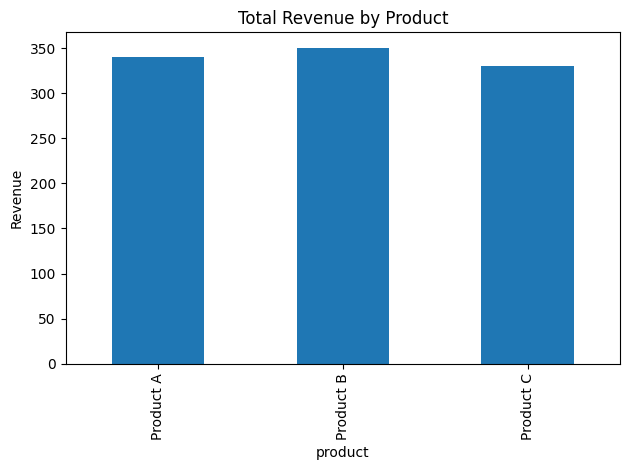

In [14]:

df.plot(kind='bar', x='product', y='total_revenue', legend=False)
plt.title("Total Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [17]:
conn = sqlite3.connect("sales_data.db")
query = "SELECT * FROM sales"
df = pd.read_sql_query(query, conn)
print(df)

   id    product  quantity  price
0   1  Product A        10   20.0
1   2  Product B         5   50.0
2   3  Product C         8   30.0
3   4  Product A         7   20.0
4   5  Product B         2   50.0
5   6  Product C         3   30.0


In [18]:
cursor = conn.cursor()
cursor.execute("SELECT sql FROM sqlite_master WHERE type='table' AND name='sales'")
print(cursor.fetchone()[0])

CREATE TABLE sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )


In [19]:
conn.close()